We are provided with the following system of ODEs;

$y' = sin(y) + cos(zx)$ 


$z' = e^{-yx} + \frac{sin(zx)}{x}$

we have the initial conditions as $y(-1) = 2.37$ and $z(-1) = -3.48$.

Our first task is to solve the given system of equations within the interval $[-1,4]$ and print the solutions for every step $\delta x = 0.25$.

We have implemented the coupled RK4 method for the solution which is given below:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Defining the given Initial Values
x0 = -1.0
y0 = 2.37
z0 = -3.48
h = 0.25

#Defining the given system of ODEs
def f(x, y, z):
    return np.sin(y) + np.cos(z * x)

def g(x, y, z):
    return np.exp(-y * x) + (np.sin(z * x) / x if x != 0 else 0)

x = np.arange(x0,4+h,h) #creating x-srray within the given interval
y = [y0]
z = [z0]


#RK4 Implementation
for x0 in x:
    k1 = h * f(x0, y0, z0)
    l1 = h * g(x0, y0, z0)

    k2 = h * f(x0 + h / 2, y0 + k1 / 2, z0 + l1 / 2)
    l2 = h * g(x0 + h / 2, y0 + k1 / 2, z0 + l1 / 2)

    k3 = h * f(x0 + h / 2, y0 + k2 / 2, z0 + l2 / 2)
    l3 = h * g(x0 + h / 2, y0 + k2 / 2, z0 + l2 / 2)

    k4 = h * f(x0 + h, y0 + k3, z0 + l3)
    l4 = h * g(x0 + h, y0 + k3, z0 + l3)

    dy = (1 / 6) * (k1 + 2 * (k2 + k3) + k4)
    dz = (1 / 6) * (l1 + 2 * (l2 + l3) + l4)

    y0 += dy
    z0 += dz

    y.append(y0)
    z.append(z0)

#Matching the dimensions
y = y[0:-1]
z = z[0:-1]

#Printing of the acquired solutions
for i in range(len(x)):
    print(f"Solution at x = {x[i]}: y({x[i]}) = {y[i]}, z({x[i]}) = {z[i]}")

Solution at x = -1.0: y(-1.0) = 2.37, z(-1.0) = -3.48
Solution at x = -0.75: y(-0.75) = 2.439910426053102, z(-0.75) = -1.6466169330354197
Solution at x = -0.5: y(-0.5) = 2.753486041398278, z(-0.5) = -0.628562562702929
Solution at x = -0.25: y(-0.25) = 3.0576866845120643, z(-0.25) = 0.058066676450051036
Solution at x = 0.0: y(0.0) = 3.297348743253115, z(0.0) = 0.4914475487179133
Solution at x = 0.25: y(0.25) = 3.483465681260725, z(0.25) = 0.7988205785418068
Solution at x = 0.5: y(0.5) = 3.615762335746457, z(0.5) = 1.0983816721750321
Solution at x = 0.75: y(0.75) = 3.668362107984251, z(0.75) = 1.404516255761754
Solution at x = 1.0: y(1.0) = 3.59828544179304, z(1.0) = 1.6910109852660749
Solution at x = 1.25: y(1.25) = 3.4000126962876664, z(1.25) = 1.8932661691805766
Solution at x = 1.5: y(1.5) = 3.147076573253608, z(1.5) = 1.9780832820996535
Solution at x = 1.75: y(1.75) = 2.9274969548521894, z(1.75) = 1.9693508618846156
Solution at x = 2.0: y(2.0) = 2.7813682244967937, z(2.0) = 1.9076905

Next, we have to plot $y(x)$ and $z(x)$ as a function of $x$ and then the parametric plot of $z(x)$ vs. $y(x)$. The plots are given below:

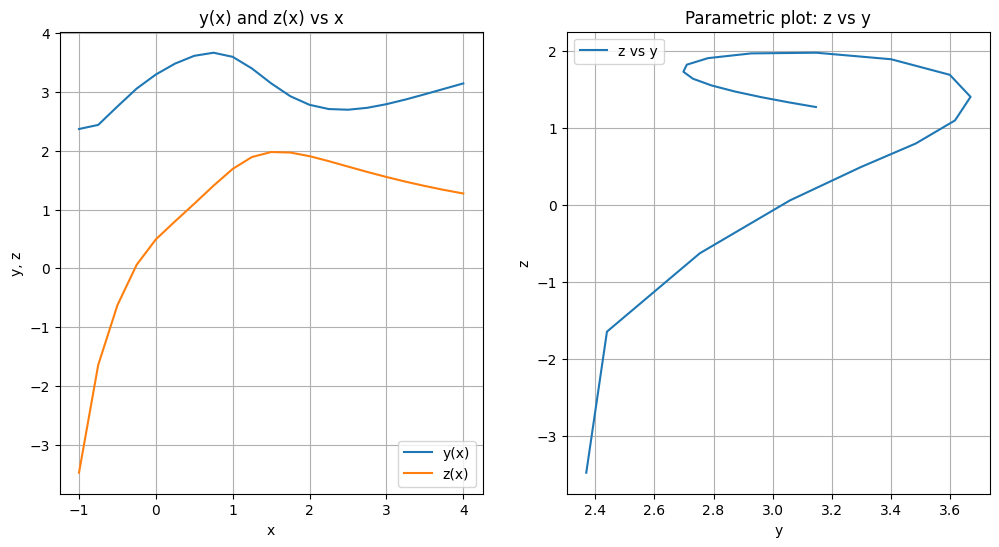

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, y, label="y(x)")
plt.plot(x, z, label="z(x)")
plt.xlabel("x")
plt.ylabel("y, z")
plt.title("y(x) and z(x) vs x")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(y, z, label="z vs y")
plt.xlabel("y")
plt.ylabel("z")
plt.title("Parametric plot: z vs y")
plt.legend()
plt.grid()
plt.show()